# Graph Processor

> Take care of graph data

In [ ]:
#| default_exp processor

In [ ]:
#| export
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings

from tqdm import tqdm

from fastcore.utils import *  # for example: patch

import seaborn as sns
sns.set_theme()

In [ ]:
#| export
class GraphProcessor:
    def __init__(self, file_path=None):
        self.file_path = file_path
        self.G = None
        self.labels = None
        self.labels_numpy = None
        self.A = None

        # # initialize the graph
        # self.read_graph_from_dot()

    def read_graph_from_dot(self, file_path=None, show_info=True):
        if file_path is None:
            file_path = self.file_path
        if file_path is None:
            raise ValueError("File path not provided.")

        # Read graph from .dot file
        self.G = nx.DiGraph(nx.nx_agraph.read_dot(file_path))  # MultiDiGraph -> DiGraph
        self.labels = {node: self.G.nodes[node]['label'] for node in self.G.nodes}
        # convert labels to numpy int
        self.labels_numpy = np.array([int(self.labels[node]) for node in self.G.nodes])

        # get connection matrix
        num_nodes = len(self.G.nodes)
        nodes = list(self.G.nodes)
        self.A = np.zeros((num_nodes, num_nodes))

        for edge in self.G.edges:
            source = nodes.index(edge[0])
            target = nodes.index(edge[1])
            self.A[source][target] = 1

        if show_info:
            print("Graph loaded from file:", file_path)
            print("Number of nodes:", num_nodes)
            print("Number of edges:", len(self.G.edges))

In [ ]:
# read a graph from file
temp_path = f'../data/probabilistic5_6.dot'
temp_graph = nx.DiGraph(nx.nx_agraph.read_dot(temp_path))
temp_graph

<networkx.classes.digraph.DiGraph>

In [ ]:
# show the nodes and labels
for idx, node in enumerate(temp_graph.nodes):
    print(node, temp_graph.nodes[node])

0 {'label': '1'}
1 {'label': '1'}
2 {'label': '1'}
3 {'label': '1'}
4 {'label': '1'}
5 {'label': '1'}
6 {'label': '2'}
7 {'label': '2'}
8 {'label': '2'}
9 {'label': '2'}
10 {'label': '2'}
11 {'label': '2'}
12 {'label': '3'}
13 {'label': '3'}
14 {'label': '3'}
15 {'label': '3'}
16 {'label': '3'}
17 {'label': '3'}
18 {'label': '4'}
19 {'label': '4'}
20 {'label': '4'}
21 {'label': '4'}
22 {'label': '4'}
23 {'label': '4'}
24 {'label': '5'}
25 {'label': '5'}
26 {'label': '5'}
27 {'label': '5'}
28 {'label': '5'}
29 {'label': '5'}


In [ ]:
# convert labels to numpy
labels = {node: temp_graph.nodes[node]['label'] for node in temp_graph.nodes}
# convert labels to numpy int
labels_numpy = np.array([int(labels[node]) for node in temp_graph.nodes])

labels_numpy

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5])

In [ ]:
# create a graph processor object
temp_path = f'../data/probabilistic5_6.dot'
graph1 = GraphProcessor(file_path = temp_path)

graph1.read_graph_from_dot()

Graph loaded from file: ../data/probabilistic5_6.dot
Number of nodes: 30
Number of edges: 170


In [ ]:
#| export
# visualize the graph
@patch
def visualize_graph(self:GraphProcessor):
    # Visualize the graph
    if self.G is not None:
        options = {
            'node_size': 100,
            'arrowstyle': '-|>',
            'arrowsize': 12,
        }
        nx.draw_networkx(self.G, arrows=True, **options)
        plt.show()
    else:
        print("Graph not yet loaded. Call read_graph() first.")

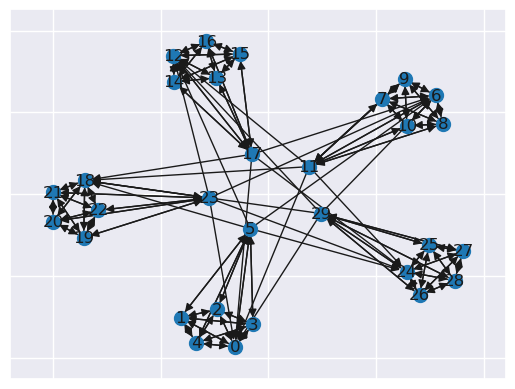

In [ ]:
# temp_path = f'../data/probabilistic5_6.dot'
# graph1 = GraphProcessor(file_path = temp_path)

# graph1.read_graph_from_dot()

graph1.visualize_graph()

In [ ]:
#| export
# get the ground truth labels
@patch
def get_groundtruth_labels(self:GraphProcessor, dtype='numpy'):
    # Get groundtruth labels from node attributes
    if self.G is not None:
        if dtype == 'dict':
            return self.labels
        elif dtype == 'numpy':
            return self.labels_numpy
    else:
        print("Graph not yet loaded. Call read_graph() first.")
        return None

In [ ]:
print(graph1.get_groundtruth_labels(dtype = 'numpy'))
print(graph1.get_groundtruth_labels(dtype = 'dict'))

[1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5]
{'0': '1', '1': '1', '2': '1', '3': '1', '4': '1', '5': '1', '6': '2', '7': '2', '8': '2', '9': '2', '10': '2', '11': '2', '12': '3', '13': '3', '14': '3', '15': '3', '16': '3', '17': '3', '18': '4', '19': '4', '20': '4', '21': '4', '22': '4', '23': '4', '24': '5', '25': '5', '26': '5', '27': '5', '28': '5', '29': '5'}


In [ ]:
#| export
# get the connection matrix A
@patch
def get_connection_matrix(self:GraphProcessor):
    # Generate connection matrix A
    if self.A is not None:
        return self.A
    else:
        print("Graph not yet loaded. Call read_graph() first.")
        return None

<Axes: >

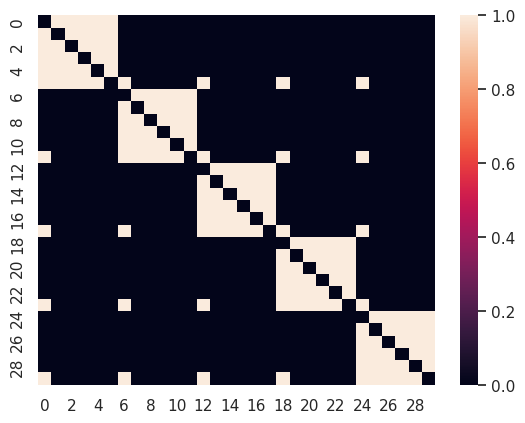

In [ ]:
sns.heatmap(graph1.get_connection_matrix())

In [ ]:
#| export
# Set graph from adjacency matrix
@patch
def set_graph_from_adjacency_matrix(self:GraphProcessor, A):
    # Set graph from adjacency matrix
    self.A = A
    self.G = nx.DiGraph(A)
    self.labels = {node: i for i, node in enumerate(self.G.nodes)}
    self.labels_numpy = np.array([int(self.labels[node]) for node in self.G.nodes])

(30, 30)


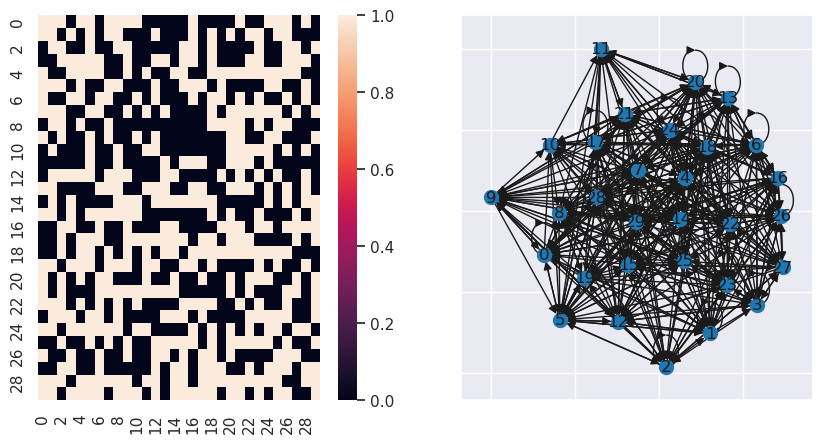

In [ ]:
# A = np.random.randn(30,30)
A = np.random.choice([0,1], (30,30))
print(A.shape)
graph1.set_graph_from_adjacency_matrix(A)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(graph1.get_connection_matrix(), ax=axs[0])
axs[1] = graph1.visualize_graph()

In [ ]:
#| export
# ccreate a random walk on the graph for generating trajectories(Syncmap data)
@patch
def random_walk_on_graph(self:GraphProcessor, connection_matrix=None, L=3000, reset_time=None):
    if connection_matrix is None:
        connection_matrix = self.A

    num_nodes = connection_matrix.shape[0]

    # Find nodes with no outgoing connections
    no_outgoing = np.where(np.sum(connection_matrix, axis=1) == 0)[0]
    if len(no_outgoing) != 0:
        warnings.warn("Some nodes have no outgoing connections.")

    starting_node = np.random.choice(num_nodes)

    while starting_node in no_outgoing:
        warnings.warn("Starting node has no outgoing connections. Choosing another node.")
        starting_node = np.random.choice(num_nodes)

    trajectory = []
    one_hot_vectors = []

    current_node = starting_node
    steps_since_reset = 0

    print("Random walk starting node:", current_node)

    for _ in tqdm(range(L)):
        # Record current node index
        trajectory.append(current_node)

        # Generate one-hot vector for current node
        one_hot = np.zeros(num_nodes, dtype=np.bool_)
        one_hot[current_node] = True
        one_hot_vectors.append(one_hot)

        # Choose next node based on outgoing connections
        if np.sum(connection_matrix[current_node]) == 0 or (
                reset_time is not None and steps_since_reset == reset_time):
            current_node = np.random.choice(num_nodes)
            warnings.warn("No outgoing connections from current node. Choosing another node.")
            steps_since_reset = 0
        else:
            prob = connection_matrix[current_node] / np.sum(connection_matrix[current_node])
            current_node = np.random.choice(num_nodes, p=prob)
            steps_since_reset += 1

    return np.array(trajectory), np.array(one_hot_vectors)


In [ ]:
# regenerate the graph
temp_path = f'../data/probabilistic5_6.dot'
graph1 = GraphProcessor(file_path = temp_path)

graph1.read_graph_from_dot()

Graph loaded from file: ../data/probabilistic5_6.dot
Number of nodes: 30
Number of edges: 170


In [ ]:
traj, one_hot = graph1.random_walk_on_graph(L = 300)

Random walk starting node: 23


100%|██████████| 300/300 [00:00<00:00, 46689.84it/s]


(300,)


<Axes: >

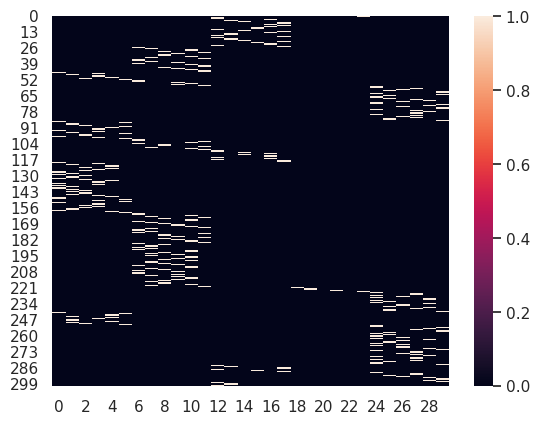

In [ ]:
print(traj.shape)
sns.heatmap(one_hot)